In [2]:
import os
os.chdir("/Users/boxiang/Documents/!-work/Baidu/projects/sim_anneal/scripts/")
from cai_sim_anneal.optimize import RNA, SimAnnealer, Plotter, run

In [2]:
iteration = 50000
objective = "max"
factor = 0.001
anneal_schedule = "linear"
alpha = None
seed = 0
out_file = "results_it-50000.pkl"
run(iteration, objective, factor, anneal_schedule, alpha, seed, out_file)

  0%|          | 62/50000 [00:00<01:20, 616.83it/s]

Model:             <cai_sim_anneal.optimize.RNA object at 0x7fe2af813520>
Iteration:         50000
Objective:         max
Factor:            0.001
Anneal Schedule:   linear
Alpha:             2e-05
Seed:              0


100%|██████████| 50000/50000 [01:08<00:00, 726.40it/s]


In [3]:
from utils.utils import cfg_file, load_config
import dill
import pandas as pd
cfg = load_config(cfg_file)

out_file = "results_it-50000.pkl"
with open(os.path.join(cfg.DATA.PROCESSED.CAI_ANNEAL, out_file), "rb") as f:
    results = dill.load(f)

ref_points = pd.read_csv(cfg.DATA.RAW.REF_P)
sim_anneal = [(k, v["CAI"]) for k, v in results["results"].items()]
sim_anneal = pd.DataFrame(
    sim_anneal, columns=["Iteration", "CAI"])

plotter = Plotter(ref_points)
plotter.add_points(sim_anneal, name="Simulated Annealing", color="red", shape="^")

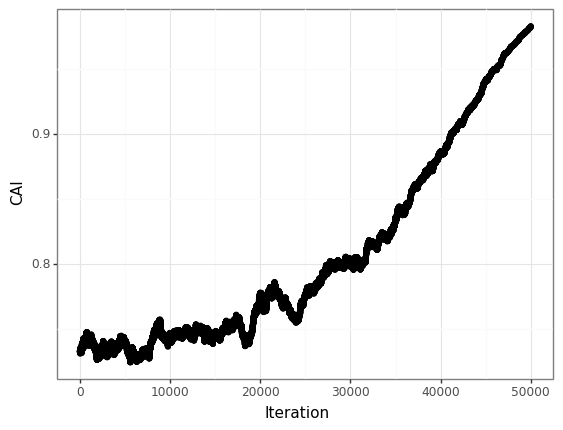

<ggplot: (8795629061943)>

In [4]:
plotter.plot_cai_vs_iteration()

In [5]:
import subprocess
def get_mfe(seq, folding_cmd):
    cmd = f"echo {seq} | {folding_cmd}"
    output = subprocess.run(cmd, capture_output=True, shell=True)
    mfe = output.stdout.decode("utf-8").split("\n")[1].split(" (")[1]
    return float(mfe.replace(")", ""))

In [6]:
all_idx = [i for i in results["results"]]
small_idx = all_idx[::300]

In [7]:
small_results = dict()
for idx in small_idx:
    small_results[idx] = results["results"][idx]

In [8]:
from tqdm import tqdm
for i in tqdm(small_results):
    seq = small_results[i]["seq"]
    mfe = get_mfe(seq, "/Users/boxiang/Documents/!-work/Baidu/projects/sim_anneal/scripts/bin/LinearFold_d0_version/linearfold -V -b 50")
    small_results[i]["MFE"] = mfe

100%|██████████| 106/106 [03:37<00:00,  2.05s/it]


In [9]:
ref_points = pd.read_csv(cfg.DATA.RAW.REF_P)
sim_anneal = [(k, v["MFE"], v["CAI"]) for k, v in small_results.items()]
sim_anneal = pd.DataFrame(
    sim_anneal, columns=["Iteration", "MFE", "CAI"])

plotter = Plotter(ref_points)
plotter.add_points(sim_anneal, name="Simulated Annealing", color="red", shape="^")

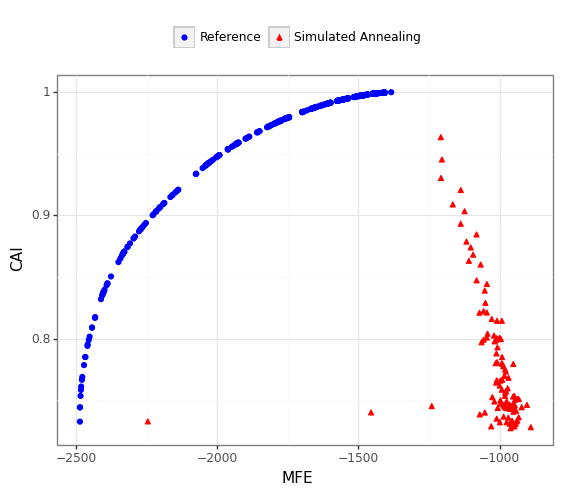

<ggplot: (8795606559166)>

In [10]:
from plotnine import scale_color_manual
plotter.plot_cai_vs_mfe()